In [1]:
%matplotlib notebook
import numpy as np
from compecon import Basis, Interpolator, InterpolatorArray
import matplotlib.pyplot as plt
import seaborn
import copy
np.set_printoptions(precision=3, suppress=True)

In [2]:
f = lambda x: np.sin(x)
g = lambda x: np.cos(x)

n = 9
a = -np.pi
b =  np.pi

B = Basis(n,a,b,nodetype='lobatto')
x = B.nodes

F = Interpolator(B, y=f(x))
G = Interpolator(B, y=g(x))

print(F.x)

[-3.142 -2.902 -2.221 -1.202 -0.     1.202  2.221  2.902  3.142]


In [3]:
LL = [f(x),g(x), f(x) + g(x), f(x)**2 + g(x)**2]

In [4]:
P = np.array([Interpolator(B, y=ll) for ll in LL])

In [5]:
ni = 4
nj = 4
i_j = [(i,j) for i in range(ni) for j in range(nj)]

Value = np.array([Interpolator(B) for k in i_j]).reshape([ni,nj])

In [6]:
for i, j in i_j:
    Value[i,j].y = f(x)**i  + g(x)**j

In [7]:
nx = 45
xx = np.linspace(a,b,nx)

<IPython.core.display.Javascript object>


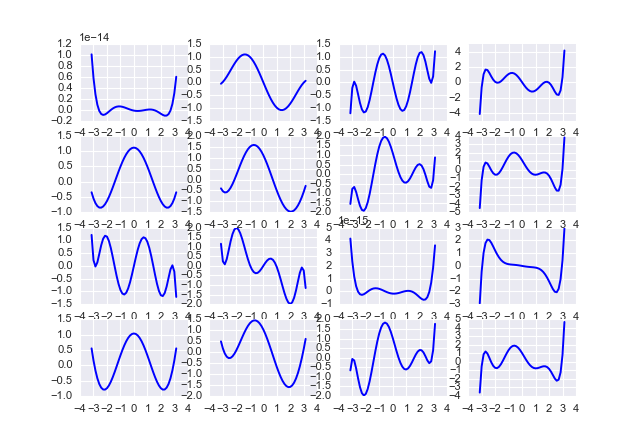

In [8]:
fig, ax = plt.subplots(ni,nj)
for i,j in i_j:
    ax[i,j].plot(xx,Value[i,j](xx,1),color='blue')

In [9]:
%%timeit
V1 = [Value[i,j](xx,1) for i,j in i_j]

100 loops, best of 3: 7.02 ms per loop


In [10]:
Value2 = InterpolatorArray(B,[ni,nj])
for i, j in i_j:
    Value2[i,j] = f(x)**i  + g(x)**j

In [11]:
%%timeit
V2 = Value2(xx,1)

1000 loops, best of 3: 481 µs per loop


In [12]:
V2 = Value2(xx,1)

<IPython.core.display.Javascript object>


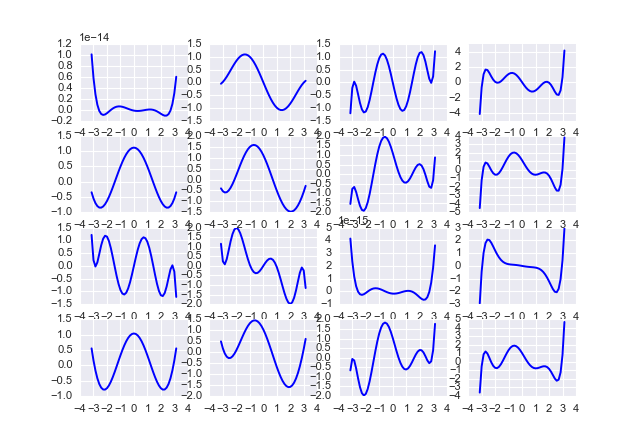

In [13]:
fig, ax = plt.subplots(ni,nj)
for i,j in i_j:
    ax[i,j].plot(xx,V2[i,j],color='blue')

In [16]:
V3 = Value2[1](xx,1)
V3.shape

(4, 45)